In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import sklearn
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(908, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

<AxesSubplot:>

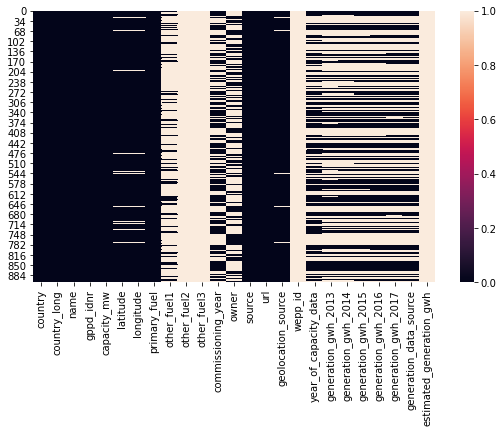

In [5]:
plt.figure(figsize=(9,5))
sns.heatmap(df.isnull())

In [6]:
#Removing all unwanted columns 
df.drop("estimated_generation_gwh",axis=1 , inplace=True)
df.drop("wepp_id",axis=1 , inplace=True)
df.drop("owner",axis=1 , inplace=True)
df.drop("other_fuel2",axis=1 , inplace=True)
df.drop("other_fuel3",axis=1 , inplace=True)

In [7]:
#observation reference 
df.shape

(908, 20)

In [8]:
# replace
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")

Modcol=["latitude","longitude","other_fuel1","commissioning_year","generation_data_source","geolocation_source","year_of_capacity_data"]
for i in Modcol:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
    
imp1= SimpleImputer(strategy="mean")
meancol=["generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017"] 
for i in meancol:
    df[i]=imp1.fit_transform(df[i].values.reshape(-1,1))   
   

In [9]:
df.sample(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
52,IND,India,BANER,IND0000028,12.00,32.1686,76.4695,Hydro,Oil,1996.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
830,IND,India,Tata BP - Electronics City Solar Panel Plant,WRI1026216,0.00,12.8491,77.6752,Solar,Oil,2013.0,Tata BP Solar India Limited,http://www.tatabpsolar.com,Industry About,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
241,IND,India,Gadag Wind Farm,WRI1026072,25.60,15.3418,75.5868,Wind,Oil,2013.0,CDM,https://cdm.unfccc.int/Projects/DB/BVQI1239021...,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
865,IND,India,VAIGAI DAM,IND0000492,13.50,10.0537,77.5905,Hydro,Oil,1995.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
329,IND,India,KASARGODE DG,IND0000186,21.84,12.4837,74.9929,Oil,Oil,1998.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority


<AxesSubplot:>

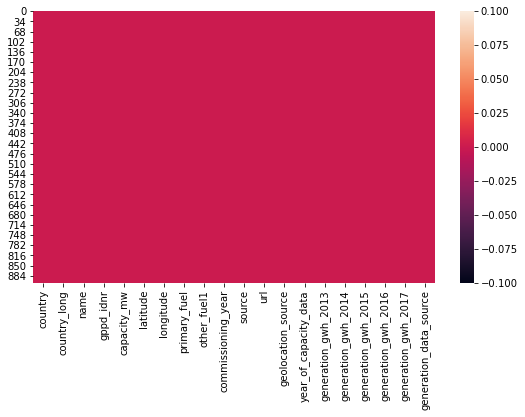

In [10]:
plt.figure(figsize=(9,5))
sns.heatmap(df.isnull())

In [11]:
df.keys()

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_data_source'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                908 non-null    float64
 6   longitude               908 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   other_fuel1             908 non-null    object 
 9   commissioning_year      908 non-null    float64
 10  source                  908 non-null    object 
 11  url                     908 non-null    object 
 12  geolocation_source      908 non-null    object 
 13  year_of_capacity_data   908 non-null    float64
 14  generation_gwh_2013     908 non-null    fl

In [13]:
encod=["country ","country_long","name","gppd_idnr","primary_fuel",
       "other_fuel1","source","url","geolocation_source","generation_data_source"]

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

encod=["country","country_long","name","gppd_idnr","primary_fuel",
       "other_fuel1","source","url","geolocation_source","generation_data_source"]
for val in encod:
    df[val]=le.fit_transform(df[val].astype(str))
    #as type describes that the data present are in str format
    
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,0,0,658,2.5,28.1839,73.2407,6,2,2011.0,109,128,1,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
1,0,0,1,520,98.0,24.7663,74.6090,1,2,2013.0,174,173,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
2,0,0,2,854,39.2,21.9038,69.3732,7,2,2013.0,21,205,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
3,0,0,3,0,135.0,23.8712,91.3602,2,2,2004.0,22,58,2,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,2015.0,22,58,2,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,16.2949,77.3568,1,2,2016.0,22,58,2,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,0
904,0,0,904,823,3.0,12.8932,78.1654,6,2,2013.0,77,22,0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
905,0,0,905,892,25.5,15.2758,75.5811,7,2,2013.0,21,260,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
906,0,0,906,540,80.0,24.3500,73.7477,1,2,2013.0,59,82,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0


In [15]:
df.describe(include='all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,908.0,908.0,908.00000,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000,908.0
mean,0.0,0.0,453.50000,453.50000,321.046378,21.084948,77.156237,3.205947,1.995595,2003.624449,43.823789,94.429515,1.733480,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
std,0.0,0.0,262.26132,262.26132,580.221767,6.107146,4.945215,2.281339,0.081214,15.238021,44.624092,70.352824,0.676835,0.0,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411,0.0
min,0.0,0.0,0.00000,0.00000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.0,226.75000,226.75000,16.837500,17.057825,73.812975,1.000000,2.000000,1997.000000,22.000000,58.000000,2.000000,2018.0,1332.538825,1175.264825,874.205000,826.629750,852.438887,0.0
50%,0.0,0.0,453.50000,453.50000,60.000000,21.278850,76.492900,3.000000,2.000000,2013.000000,22.000000,58.000000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
75%,0.0,0.0,680.25000,680.25000,388.125000,25.183775,79.211600,6.000000,2.000000,2013.000000,29.250000,115.250000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
max,0.0,0.0,907.00000,907.00000,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,190.000000,303.000000,2.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,0.0


In [16]:
#checking for unique values 
for i in df:
    print(i , df[i].unique())

country [0]
country_long [0]
name [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 

In [17]:
singval=["country","country_long","year_of_capacity_data","generation_data_source"]

for i in singval:
    df.drop(i , inplace=True , axis=1)

In [18]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,658,2.5,28.1839,73.2407,6,2,2011.0,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,520,98.0,24.7663,74.6090,1,2,2013.0,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,2,854,39.2,21.9038,69.3732,7,2,2013.0,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,3,0,135.0,23.8712,91.3602,2,2,2004.0,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,4,1,1800.0,21.9603,82.4091,1,2,2015.0,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,494,1600.0,16.2949,77.3568,1,2,2016.0,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,904,823,3.0,12.8932,78.1654,6,2,2013.0,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,905,892,25.5,15.2758,75.5811,7,2,2013.0,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,906,540,80.0,24.3500,73.7477,1,2,2013.0,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [19]:
df.shape

(908, 16)

<AxesSubplot:>

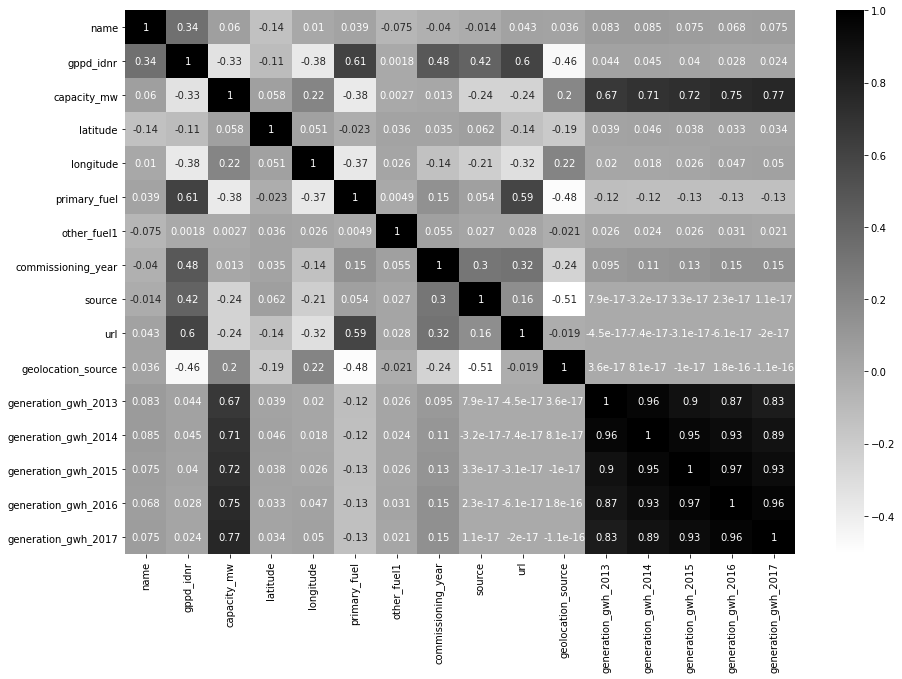

In [20]:
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True,cmap="binary")

In [21]:
df.skew()

name                    0.000000
gppd_idnr               0.000000
capacity_mw             3.193257
latitude               -0.093609
longitude               1.118449
primary_fuel            0.471141
other_fuel1           -20.464435
commissioning_year     -1.779021
source                  1.829145
url                     1.512258
geolocation_source     -2.161710
generation_gwh_2013     5.241491
generation_gwh_2014     5.041961
generation_gwh_2015     5.367370
generation_gwh_2016     5.071758
generation_gwh_2017     5.111938
dtype: float64

In [22]:
df.shape

(908, 16)

name                       AxesSubplot(0.125,0.71587;0.168478x0.16413)
gppd_idnr               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
capacity_mw             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
latitude                AxesSubplot(0.731522,0.71587;0.168478x0.16413)
longitude                 AxesSubplot(0.125,0.518913;0.168478x0.16413)
primary_fuel           AxesSubplot(0.327174,0.518913;0.168478x0.16413)
other_fuel1            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
commissioning_year     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
source                    AxesSubplot(0.125,0.321957;0.168478x0.16413)
url                    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
geolocation_source     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
generation_gwh_2013    AxesSubplot(0.731522,0.321957;0.168478x0.16413)
generation_gwh_2014          AxesSubplot(0.125,0.125;0.168478x0.16413)
generation_gwh_2015       AxesSubplot(0.327174,0.125;0.168478x0.16413)
genera

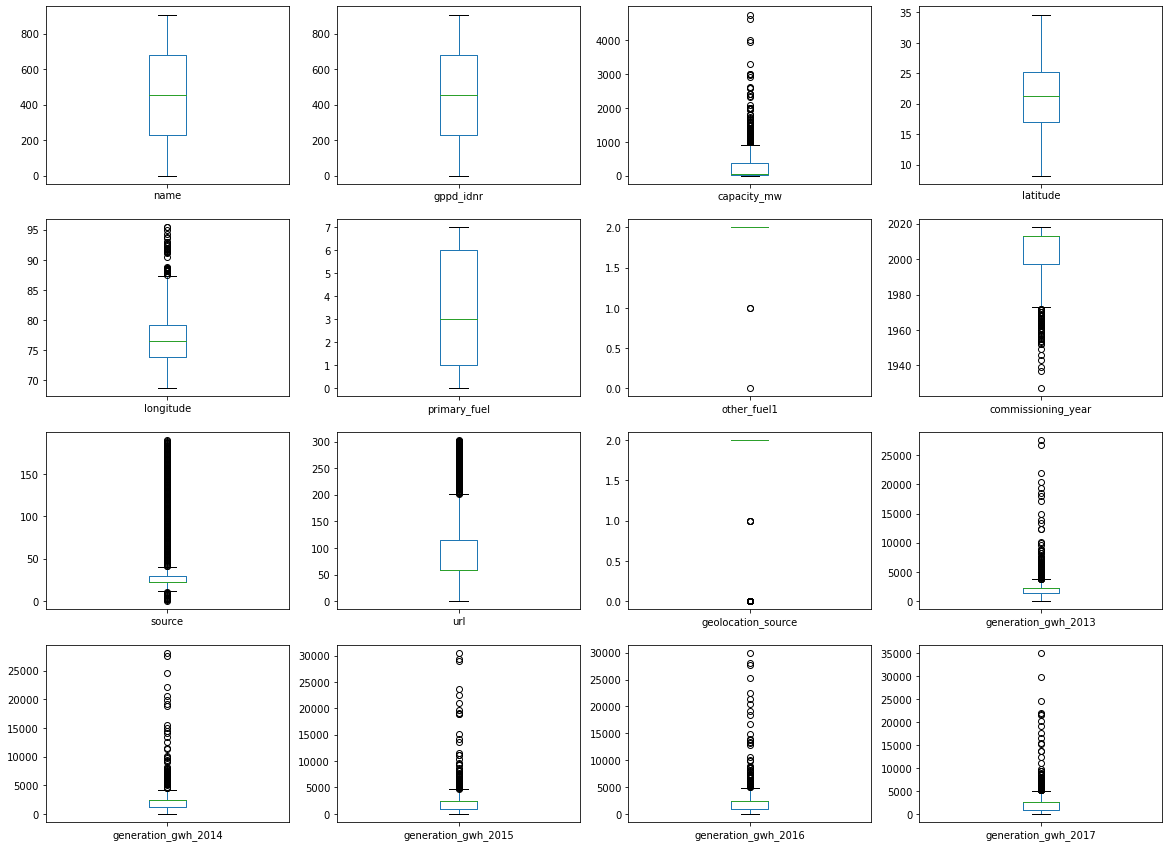

In [23]:
#will chek the outliers
# to have all box plots in the same viz
df.plot(kind="box",subplots=True,layout=(4,4) , figsize=(20,15))

In [24]:
df.shape

(908, 16)

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [26]:
df.shape

(837, 16)

In [27]:
837/908

0.9218061674008811

name                       AxesSubplot(0.125,0.71587;0.168478x0.16413)
gppd_idnr               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
capacity_mw             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
latitude                AxesSubplot(0.731522,0.71587;0.168478x0.16413)
longitude                 AxesSubplot(0.125,0.518913;0.168478x0.16413)
primary_fuel           AxesSubplot(0.327174,0.518913;0.168478x0.16413)
other_fuel1            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
commissioning_year     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
source                    AxesSubplot(0.125,0.321957;0.168478x0.16413)
url                    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
geolocation_source     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
generation_gwh_2013    AxesSubplot(0.731522,0.321957;0.168478x0.16413)
generation_gwh_2014          AxesSubplot(0.125,0.125;0.168478x0.16413)
generation_gwh_2015       AxesSubplot(0.327174,0.125;0.168478x0.16413)
genera

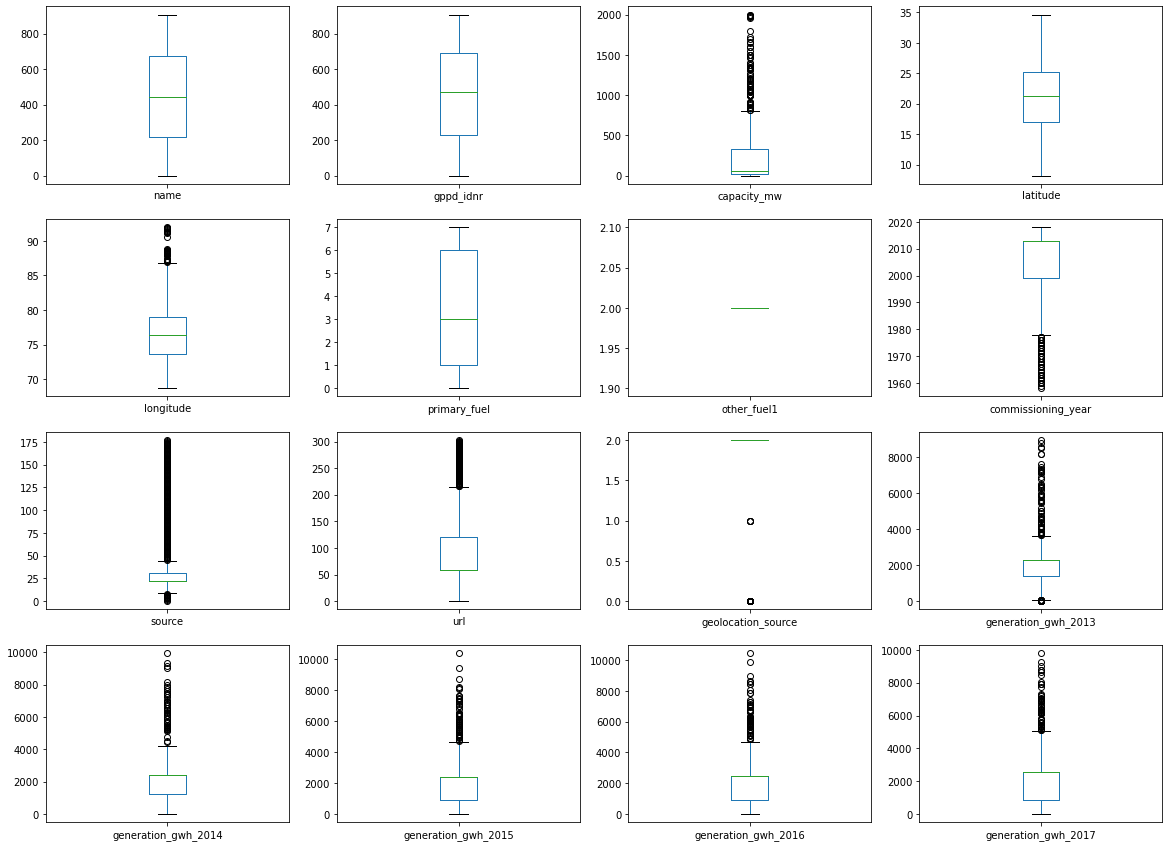

In [28]:
# to have all box plots in the same viz
df.plot(kind="box",subplots=True,layout=(4,4) , figsize=(20,15))

1.9675675421623362


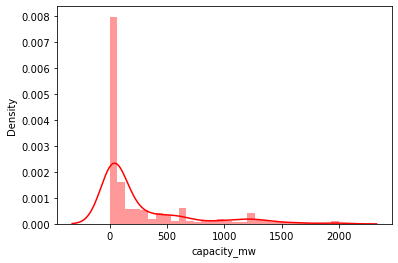

In [29]:
sns.distplot(df["capacity_mw"] ,color="r")
print(df["capacity_mw"].skew())

1.7903323967264202


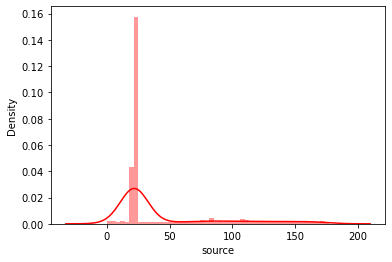

In [30]:
sns.distplot(df["source"] ,color="r")
print(df["source"].skew())

-1.5740856933781675


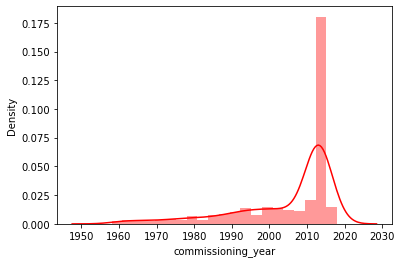

In [31]:
sns.distplot(df["commissioning_year"] ,color="r")
print(df["commissioning_year"].skew())

In [32]:
df.skew()

name                   0.024520
gppd_idnr             -0.048362
capacity_mw            1.967568
latitude              -0.068598
longitude              0.956397
primary_fuel           0.418432
other_fuel1            0.000000
commissioning_year    -1.574086
source                 1.790332
url                    1.437903
geolocation_source    -2.110249
generation_gwh_2013    1.542740
generation_gwh_2014    1.451320
generation_gwh_2015    1.336416
generation_gwh_2016    1.359071
generation_gwh_2017    1.252276
dtype: float64

In [33]:
#treating all columns  which has skewness more that 0.5 or -0.5 
skewlist=["capacity_mw","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015",
          "generation_gwh_2016","generation_gwh_2017","source","url","commissioning_year","geolocation_source"]

for i in skewlist:
    df[i]=np.sqrt(df[i])

In [34]:
df.skew()

name                   0.024520
gppd_idnr             -0.048362
capacity_mw            1.145418
latitude              -0.068598
longitude              0.956397
primary_fuel           0.418432
other_fuel1            0.000000
commissioning_year    -1.579925
source                 1.468937
url                    0.918293
geolocation_source    -2.127624
generation_gwh_2013   -0.476501
generation_gwh_2014   -0.484584
generation_gwh_2015   -0.444618
generation_gwh_2016   -0.396450
generation_gwh_2017   -0.416702
dtype: float64

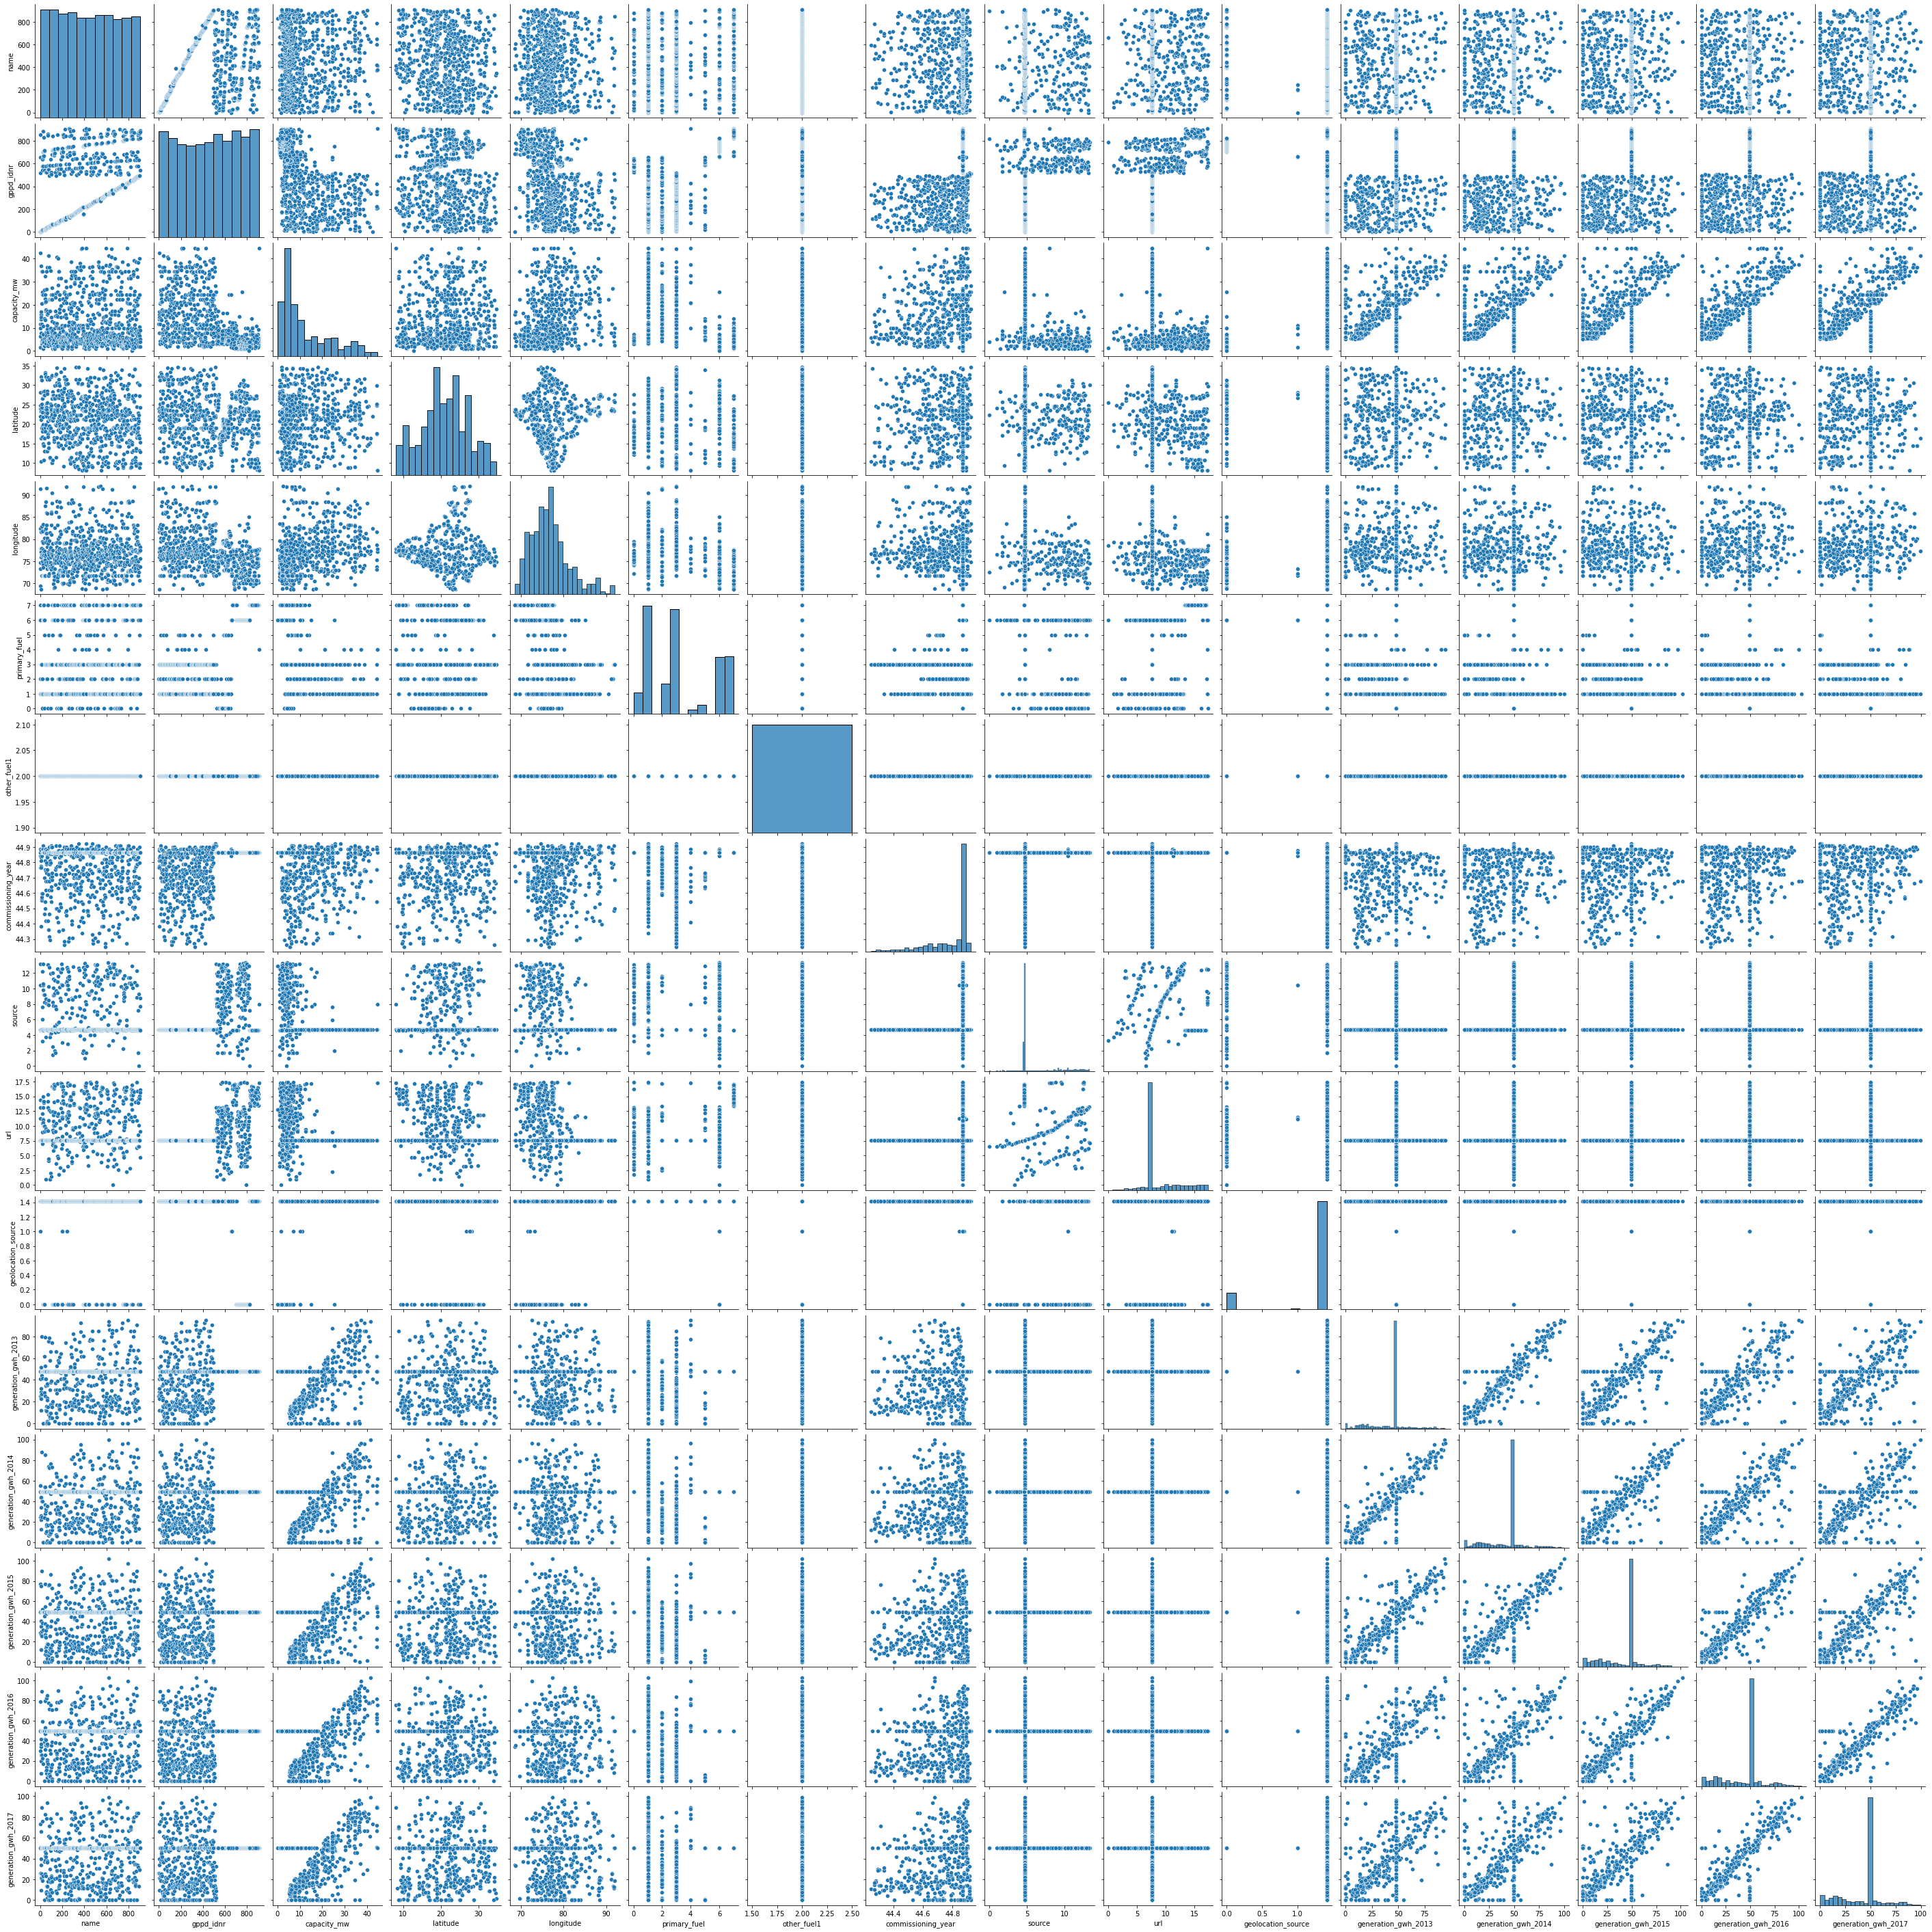

In [35]:
sns.pairplot(df)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(ds):
    vif=pd.DataFrame()
    vif["variables"]=ds.columns
    vif["VIF FACTOR"]=[variance_inflation_factor (ds.values,i) for i in range (ds.shape[1])]
    return (vif)

calc_vif(df)

,variables,VIF FACTOR
0,name,1.568867
1,gppd_idnr,5.165074
2,capacity_mw,2.190088
3,latitude,1.119362
4,longitude,1.309135
5,primary_fuel,3.897900
6,other_fuel1,151355.639549
7,commissioning_year,1.713588
8,source,2.137582
9,url,2.710240


In [37]:
df.shape

(837, 16)

<AxesSubplot:>

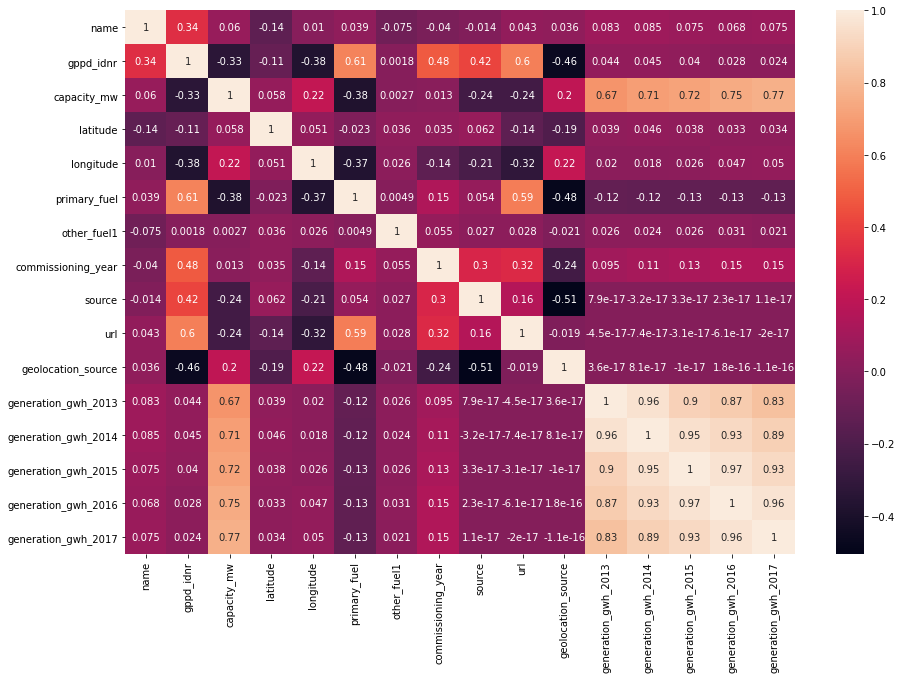

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

### Working towards primary fuel prediction  . 


In [39]:
# splitting target 
x=df.drop("primary_fuel",axis=1)
y=df["primary_fuel"]

from sklearn.model_selection import train_test_split 

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#saving best random state 
maxAccuracy=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccuracy:
        maxAccuracy=accu
        maxRS=i

print("best accuracy  is ",maxAccuracy, "with random state ",maxRS)


#note- code running before using PCA 

best accuracy  is  0.8650793650793651 with random state  114


In [41]:
from sklearn.decomposition import PCA
PCa=PCA(n_components=10)

In [42]:
maxAccuracy=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccuracy:
        maxAccuracy=accu
        maxRS=i

print("best accuracy  is ",maxAccuracy, "with random state ",maxRS)


#note- code running after using PCA 

best accuracy  is  0.8492063492063492 with random state  141


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=141)

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc1=classification_report(y_test,pred)
print(acc1)

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.87      0.75      0.81        69
           2       0.64      0.61      0.62        23
           3       0.84      0.90      0.87        72
           4       0.00      0.00      0.00         1
           5       0.20      0.50      0.29         2
           6       0.97      1.00      0.99        33
           7       1.00      1.00      1.00        37

    accuracy                           0.85       252
   macro avg       0.65      0.70      0.67       252
weighted avg       0.85      0.85      0.85       252



In [45]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
acc2=classification_report(y_test,pred)
print(acc2)

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.81      0.83      0.82        69
           2       0.86      0.26      0.40        23
           3       0.81      0.92      0.86        72
           4       0.00      0.00      0.00         1
           5       0.40      1.00      0.57         2
           6       0.97      1.00      0.99        33
           7       1.00      1.00      1.00        37

    accuracy                           0.85       252
   macro avg       0.70      0.73      0.68       252
weighted avg       0.86      0.85      0.84       252



In [46]:
from sklearn.svm import SVC

SVCc=SVC()
SVCc.fit(x_train,y_train)
pred=SVCc.predict(x_test)
acc3=classification_report(y_test,pred)
print(acc3)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.57      0.62      0.59        69
           2       0.00      0.00      0.00        23
           3       0.59      0.92      0.72        72
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.69      0.82      0.75        33
           7       0.81      0.57      0.67        37

    accuracy                           0.62       252
   macro avg       0.33      0.37      0.34       252
weighted avg       0.53      0.62      0.56       252



In [47]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred=KNN.predict(x_test)
acc3=classification_report(y_test,pred)
print(acc3)

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        15
           1       0.62      0.49      0.55        69
           2       0.23      0.13      0.17        23
           3       0.56      0.75      0.64        72
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.84      0.82      0.83        33
           7       0.79      0.73      0.76        37

    accuracy                           0.62       252
   macro avg       0.45      0.47      0.45       252
weighted avg       0.61      0.62      0.61       252



In [48]:
# Cross validation
from sklearn.model_selection import cross_val_score

models=(DTC,RF,SVCc,KNN)
for i in models:
    print (i , cross_val_score(i,x,y,cv=15).mean()*100)

DecisionTreeClassifier() 81.24675324675326
RandomForestClassifier() 84.94588744588746
SVC() 62.32900432900432
KNeighborsClassifier() 54.02380952380953


In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
parameters={"max_features":["auto","sqrt","log2"],
            "criterion":["gini","entropy"],
            "n_estimators":np.arange(1,10),
           "max_depth":np.arange(1,10)}

### using hyper parameter

In [51]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=15)

#note - keeping the cv value  higher for  better result 

In [52]:
RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [53]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=15, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [54]:
#getting the best params 
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 6}

In [55]:
#saving best model with  GCV 
Primary_fule_model=RandomForestClassifier(criterion="entropy",max_depth=8,max_features="log2",n_estimators=9)
Primary_fule_model.fit(x_train,y_train)
pred=Primary_fule_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print (acc*100)

80.15873015873017


In [56]:
#saving  final model 
import joblib
joblib.dump(Primary_fule_model,"Primary_fuel_model.pkl")

['Primary_fuel_model.pkl']

In [57]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,658,1.581139,28.1839,73.2407,6,2,44.844175,10.440307,11.313708,1.000000,48.000617,49.197493,49.133210,49.537221,50.316543
1,1,520,9.899495,24.7663,74.6090,1,2,44.866469,13.190906,13.152946,1.414214,48.000617,49.197493,49.133210,49.537221,50.316543
2,2,854,6.260990,21.9038,69.3732,7,2,44.866469,4.582576,14.317821,1.414214,48.000617,49.197493,49.133210,49.537221,50.316543
3,3,0,11.618950,23.8712,91.3602,2,2,44.766059,4.690416,7.615773,1.414214,25.135193,24.855367,29.047323,29.765827,25.763822
4,4,1,42.426407,21.9603,82.4091,1,2,44.888751,4.690416,7.615773,1.414214,40.844706,55.095826,76.917943,79.012657,73.386509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,494,40.000000,16.2949,77.3568,1,2,44.899889,4.690416,7.615773,1.414214,48.000617,49.197493,0.997434,15.283869,29.417682
904,904,823,1.732051,12.8932,78.1654,6,2,44.866469,8.774964,4.690416,0.000000,48.000617,49.197493,49.133210,49.537221,50.316543
905,905,892,5.049752,15.2758,75.5811,7,2,44.866469,4.582576,16.124515,1.414214,48.000617,49.197493,49.133210,49.537221,50.316543
906,906,540,8.944272,24.3500,73.7477,1,2,44.866469,7.681146,9.055385,1.414214,48.000617,49.197493,49.133210,49.537221,50.316543


### Working towards  capacity_mw  prediction  . 


In [58]:
# splitting  target 
x1=df.drop("capacity_mw",axis=1)
y1=df["capacity_mw"]


In [59]:
from sklearn.linear_model import LinearRegression
#saving best random state 
maxscor=0
maxRS=0
for i in range (1,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.linear_model import LinearRegression
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    sco=lm.score(x_train,y_train)
    if sco>maxscor:
        maxscor=sco
        maxRS=i

print("best accuracy  is ",maxscor*100, "with random state ",maxRS)

#note- code running before using PCA 

best accuracy  is  76.64205831409 with random state  17


In [60]:
 x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=17)

In [61]:
from sklearn.decomposition import PCA
PCa=PCA(n_components=10)

In [62]:
from sklearn.linear_model import LinearRegression
#saving best random state 
maxscor=0
maxRS=0
for i in range (1,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.linear_model import LinearRegression
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    sco=lm.score(x_train,y_train)
    if sco>maxscor:
        maxscor=sco
        maxRS=i

print("best accuracy  is ",maxscor*100, "with random state ",maxRS)

#note- code running after using PCA 

best accuracy  is  76.64205831409 with random state  17


In [63]:
#linear regression 
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
lm_score=lm.score(x_train,y_train)*100
lm_score

75.41211669060434

In [64]:
#Lasso 
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.000001)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
ls_score=ls.score(x_train,y_train)*100
ls_score

75.41211668916382

In [65]:
#Ridge 
rd=Ridge(alpha=0.000001)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
rd_score=rd.score(x_train,y_train)*100
rd_score

75.41211669060432

In [66]:
#elastic net
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=0.000001)
en.fit(x_train,y_train)
pred=en.predict(x_test)
en_score=en.score(x_train,y_train)*100
en_score

75.41211668733877

In [67]:
print ("lm",lm_score)
print ("ls",ls_score)
print ("rd",rd_score)
print ("en",en_score)

lm 75.41211669060434
ls 75.41211668916382
rd 75.41211669060432
en 75.41211668733877


In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
parameters={"copy_X":["true","false"],"normalize":["true","false"],
             "fit_intercept":["true","false"],"n_jobs":np.arange(1,5)}


In [70]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=10)

In [71]:
lm.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [72]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': ['true', 'false'],
                         'fit_intercept': ['true', 'false'],
                         'n_jobs': array([1, 2, 3, 4]),
                         'normalize': ['true', 'false']})

In [73]:
GCV.best_params_

{'copy_X': 'true', 'fit_intercept': 'true', 'n_jobs': 1, 'normalize': 'true'}

In [74]:
##trying best params 
final_CMW=LinearRegression(fit_intercept="true",copy_X= 'true', n_jobs= 1, normalize= 'true')
final_CMW.fit(x_train ,y_train)
pred=final_CMW.predict(x_test)
scoree=final_CMW.score(x_train,y_train)
print(scoree*100)

75.41211669060435


In [75]:
# saving final model with params 
import joblib
joblib.dump(final_CMW,"final_capacity_mw.pkl")

['final_capacity_mw.pkl']